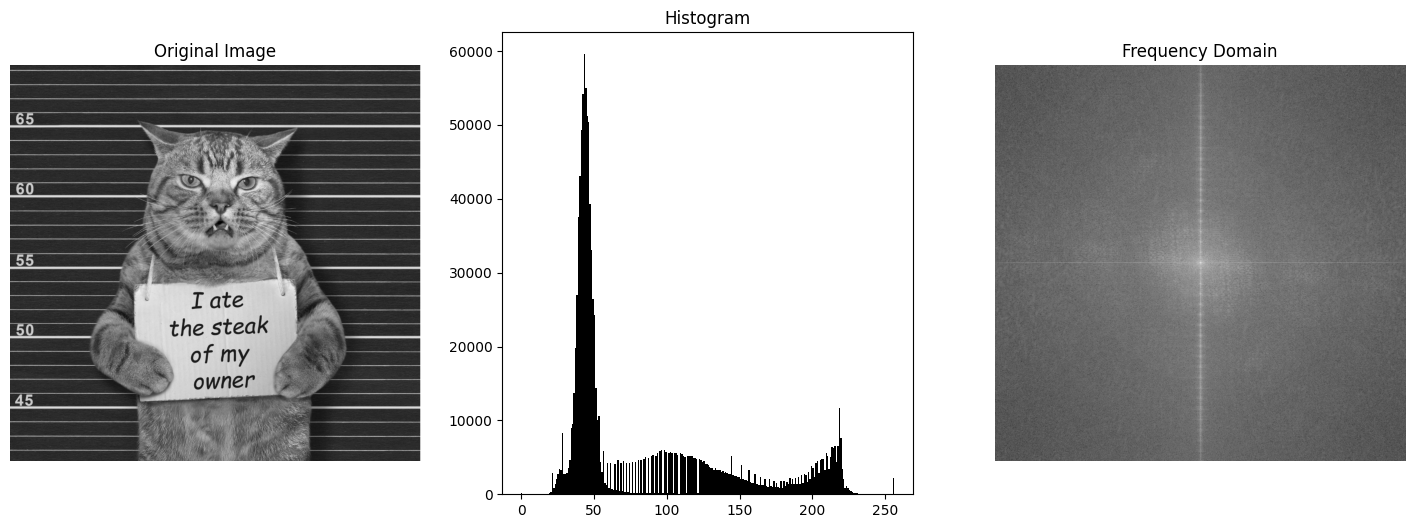

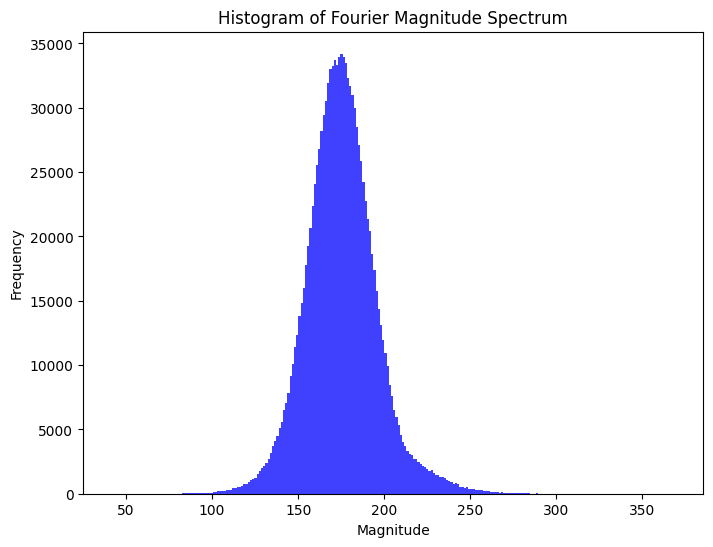

In [8]:
import cv2  # OpenCV 用於讀取圖片
import numpy as np  # 用於數學運算
import matplotlib.pyplot as plt  # 用於圖形顯示
from numpy.fft import fft2, fftshift, ifftshift    # 用於頻率域轉換

# 讀取圖片，使用灰階模式
image = cv2.imread('F:\Code\Digital-Image-Processing\Code\Resources\Data\cat.jpg', cv2.IMREAD_GRAYSCALE)

# 顯示原圖
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# 顯示直方圖
plt.subplot(1, 3, 2)
plt.hist(image.ravel(), bins=256, range=(0, 256), color='black')
plt.title('Histogram')

# 計算並顯示頻率域圖
f_transform = fft2(image)  # 進行2D快速傅立葉變換
f_transform_shifted = fftshift(f_transform)  # 移動零頻率成分到中心
magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))  # 計算頻譜的幅度

plt.subplot(1, 3, 3)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Frequency Domain')
plt.axis('off')

# 顯示所有圖像
plt.show()

# 顯示傅立葉頻譜的直方圖
plt.figure(figsize=(8, 6))
plt.hist(magnitude_spectrum.ravel(), bins=256, color='blue', alpha=0.75)
plt.title('Histogram of Fourier Magnitude Spectrum')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

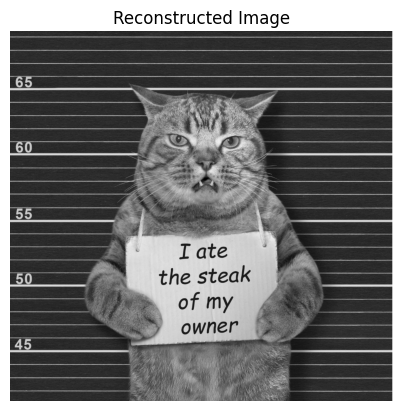

In [10]:
from numpy.fft import fft2, ifft2, fftshift, ifftshift  # 用於頻率域轉換

# 逆傅立葉變換將頻譜轉換回空間域
f_transform_ishift = ifftshift(f_transform_shifted)  # 將零頻率成分移回原來位置
image_back = ifft2(f_transform_ishift)  # 進行2D逆快速傅立葉變換
image_back = np.abs(image_back)  # 取實部，得到重建圖像

plt.imshow(image_back, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()

In [7]:
def basic_array_info(array):
    print("Shape: ", array.shape)
    print("Max: ", array.max())
    print("Min: ", array.min())
    print("Mean: ", array.mean())

basic_array_info(f_transform)

Shape:  (1080, 1118)
Max:  (102989154+0j)
Min:  (-25112754.201622114-328765.9706732429j)
Mean:  (41.99999999999996+2.1596958929001357e-14j)


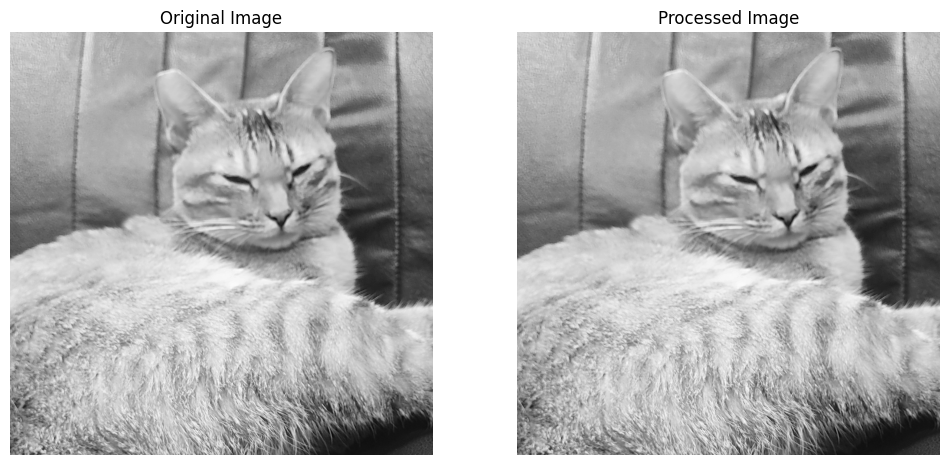

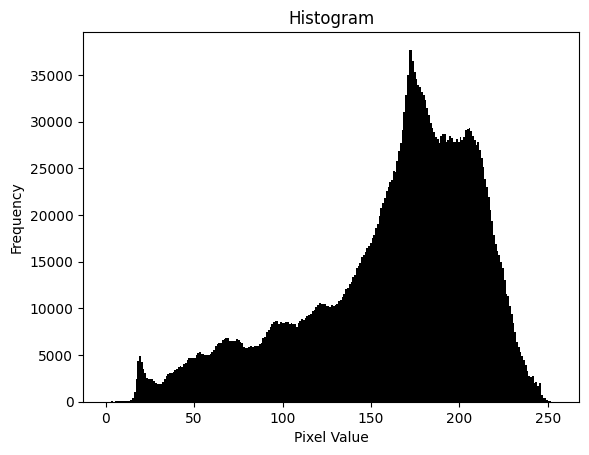

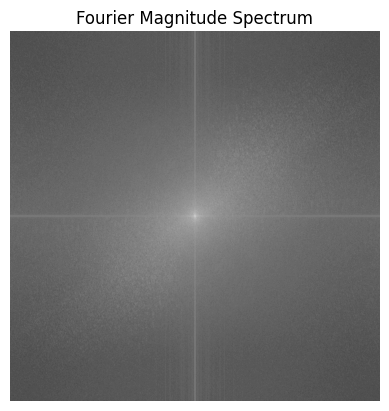

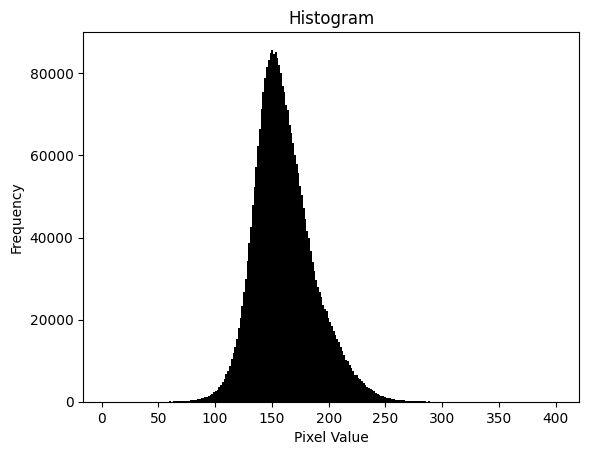

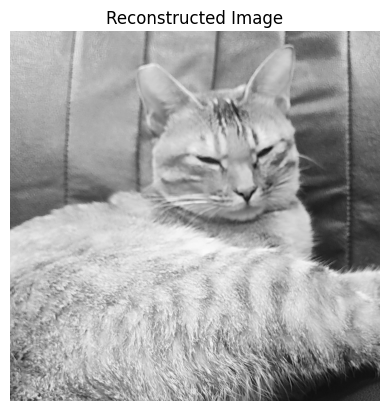

array([[209., 210., 212., ..., 178., 176., 173.],
       [212., 212., 213., ..., 174., 172., 171.],
       [212., 212., 213., ..., 176., 175., 173.],
       ...,
       [126., 128., 130., ...,  64.,  65.,  66.],
       [125., 127., 130., ...,  65.,  66.,  67.],
       [126., 126., 129., ...,  66.,  67.,  69.]])

In [18]:
import cv2  # 用於讀取圖片
import numpy as np  # 用於數學運算
import matplotlib.pyplot as plt  # 用於圖形顯示
from numpy.fft import fft2, ifft2, fftshift, ifftshift  # 用於頻率域轉換

def histogram_show(image):
    """顯示圖片的直方圖"""
    plt.figure()
    plt.hist(image.ravel(), bins=256, color='black')
    plt.title('Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

def fourier_show(image):
    """計算並顯示傅立葉頻譜和直方圖"""
    f_transform = fft2(image)  # 進行2D快速傅立葉變換
    f_transform_shifted = fftshift(f_transform)  # 移動零頻率成分到中心
    magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))  # 計算頻譜的幅度

    plt.figure()
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Fourier Magnitude Spectrum')
    plt.axis('off')
    plt.show()

    histogram_show(magnitude_spectrum)
    return f_transform_shifted

def i_fourier_show(f_transform_shifted):
    """進行逆傅立葉變換並顯示重建的圖片"""
    f_transform_ishift = ifftshift(f_transform_shifted)  # 將零頻率成分移回原來位置
    image_back = ifft2(f_transform_ishift)  # 進行2D逆快速傅立葉變換
    image_back = np.abs(image_back)  # 取實部，得到重建圖像

    plt.figure()
    plt.imshow(image_back, cmap='gray')
    plt.title('Reconstructed Image')
    plt.axis('off')
    plt.show()
    return image_back

def show(image1, image2):
    """顯示兩張圖片的對比"""
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image1, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image2, cmap='gray')
    plt.title('Processed Image')
    plt.axis('off')

    plt.show()

# 讀取圖片，使用灰階模式
origin = cv2.imread('F:\Code\Digital-Image-Processing\Code\Resources\Data\LAB_CAT2.jpg', cv2.IMREAD_GRAYSCALE)

# 顯示原圖與其直方圖
show(origin, origin)
histogram_show(origin)

# 計算傅立葉變換，顯示頻譜及其直方圖
f_image = fourier_show(origin)

# 逆傅立葉變換，顯示重建圖像
i_fourier_show(f_image)


